In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def generate_dataset():
    dataset = make_classification(n_samples=20, 
                                   n_features=1, 
                                   n_redundant=0, 
                                   n_repeated=0,
                                   shift=30,
                                   scale=10, 
                                   n_classes=2, 
                                   n_clusters_per_class=1, 
                                   n_informative=1,
                                   class_sep=1, 
                                   random_state=1)
    df = pd.DataFrame(dataset[0])
    df = pd.concat([(np.ceil(df)).astype(int), pd.DataFrame(dataset[1])], axis=1)
    df.columns = ['GRE_Score', 'Admission']
    return df

df = generate_dataset()
x = df[['GRE_Score']]  
y = df['Admission']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

y_pred = logistic_regression.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Predictions:", y_pred)
print("Accuracy:", accuracy)

Predictions: [1 1 0 0 1]
Accuracy: 1.0


## Decision Boundary

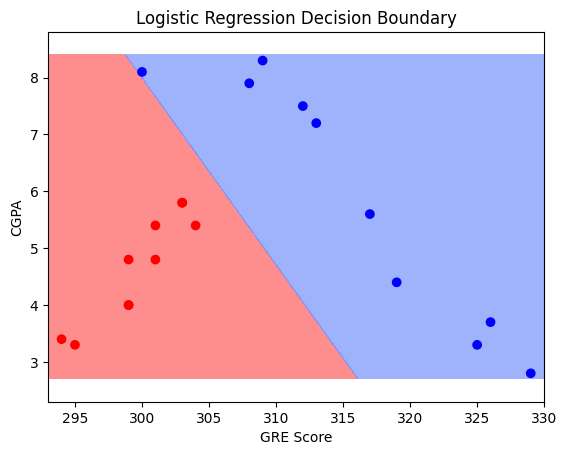

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

def generate_dataset_2d():
    dataset = make_classification(n_samples=20, 
                                   n_features=2, 
                                   n_redundant=0, 
                                   n_repeated=0,
                                   shift=[31, 2.6],
                                   scale=[10, 3], 
                                   n_classes=2, 
                                   n_clusters_per_class=1, 
                                   n_informative=2,
                                   class_sep=0.9, 
                                   random_state=10)

    y = pd.DataFrame(dataset[1])
    y = np.where(y > 0.5, 0, 1)  # Flip label for demonstration
    y = pd.DataFrame(y)
    
    df = pd.DataFrame(dataset[0])
    df = pd.concat([df, y], axis=1)
    df.columns = ['GRE_Score', 'CGPA', 'Admission']
    
    df.GRE_Score = np.ceil(df.GRE_Score).astype(int)
    df.CGPA = np.around(df.CGPA, 1)
    return df

df = generate_dataset_2d()
X = df[['GRE_Score', 'CGPA']].values
y = df['Admission'].values

logistic_regression = LogisticRegression()
logistic_regression.fit(X, y)

X1_min = X[:, 0].min()
X1_max = X[:, 0].max()
X2_min = X[:, 1].min()
X2_max = X[:, 1].max()

X1_mesh, X2_mesh = np.meshgrid(np.arange(X1_min - 1, X1_max + 1, 0.01),
                               np.arange(X2_min - 0.1, X2_max + 0.1, 0.01))

input_mesh = np.array([X1_mesh.ravel(), X2_mesh.ravel()]).T
label_mesh = logistic_regression.predict(input_mesh)

plt.contourf(X1_mesh, X2_mesh, label_mesh.reshape(X1_mesh.shape), 
             alpha=0.75, cmap=ListedColormap(('#FE6969', '#7F9AFD')))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(('red', 'blue')))
plt.xlim(X1_min - 1, X1_max + 1)
plt.ylim(X2_min - 0.5, X2_max + 0.5)

plt.title('Logistic Regression Decision Boundary')
plt.xlabel('GRE Score')
plt.ylabel('CGPA')
plt.show()